In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = 'bec5d2ec-0722-484c-b70b-a0206f680965'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(72, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,1.000000,0.000000,0.400000,1.000000,0.000000,0.489003,1.000000,0.000000,0.446400,0
24,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,1.000000,0.000000,0.479961,1.000000,0.000000,0.616507,1.000000,0.000000,0.556031,0
48,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,0.000000,1.000000,0.002008,0.000000,1.000000,0.000000,0.000000,NaN,0.000769,0
72,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,0.000000,1.000000,0.829607,0.000000,1.000000,0.867188,0.000000,1.000000,0.847285,0
96,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,0.031484,0.034363,0.041786,0.050627,0.035892,0.030771,0.024721,0.036561,0.036044,0
120,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,0.954927,0.956128,0.942992,0.926574,0.953937,0.959069,0.965324,0.953083,0.951373,0
144,PPV,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,1.000000,0.000000,0.315957,1.000000,0.000000,0.445616,1.000000,0.000000,0.385185,0
168,Positive-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,1.000000,1665.000000,3.158635,1.000000,1076.000000,2.244085,1.000000,inf,2.594158,0
192,Sample_Size,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,1429.000000,1666.000000,1795.000000,718.000000,1077.000000,1955.000000,956.000000,999.000000,3750.000000,0
216,Selection-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-05 21:25:36.431,426f4b41-5b22-4118-b5c8-15a0ab4aa18f,Exp_iter_1,100,...,0.801260,0.999400,0.876323,0.692201,0.999071,0.921739,0.839958,1.000000,0.900000,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

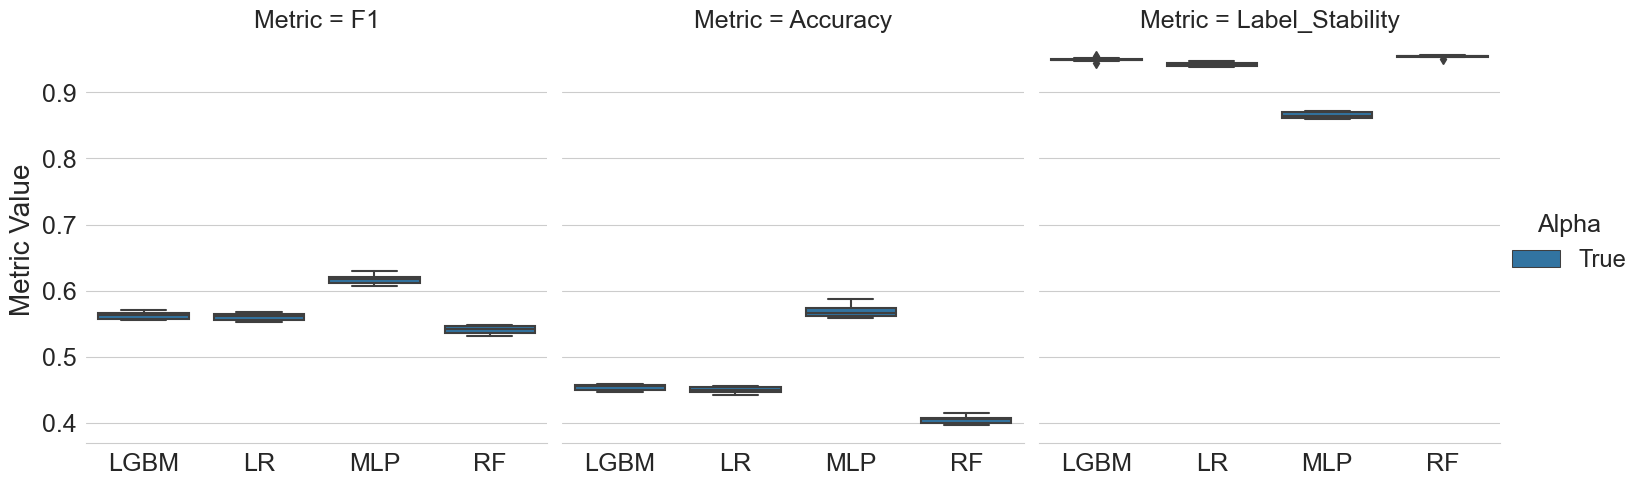

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

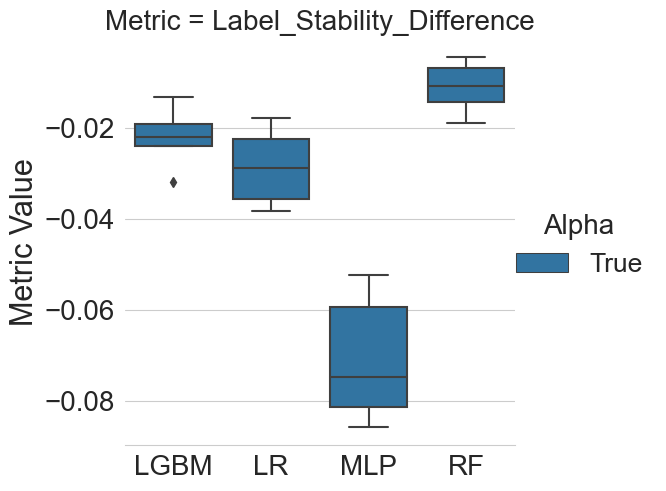

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

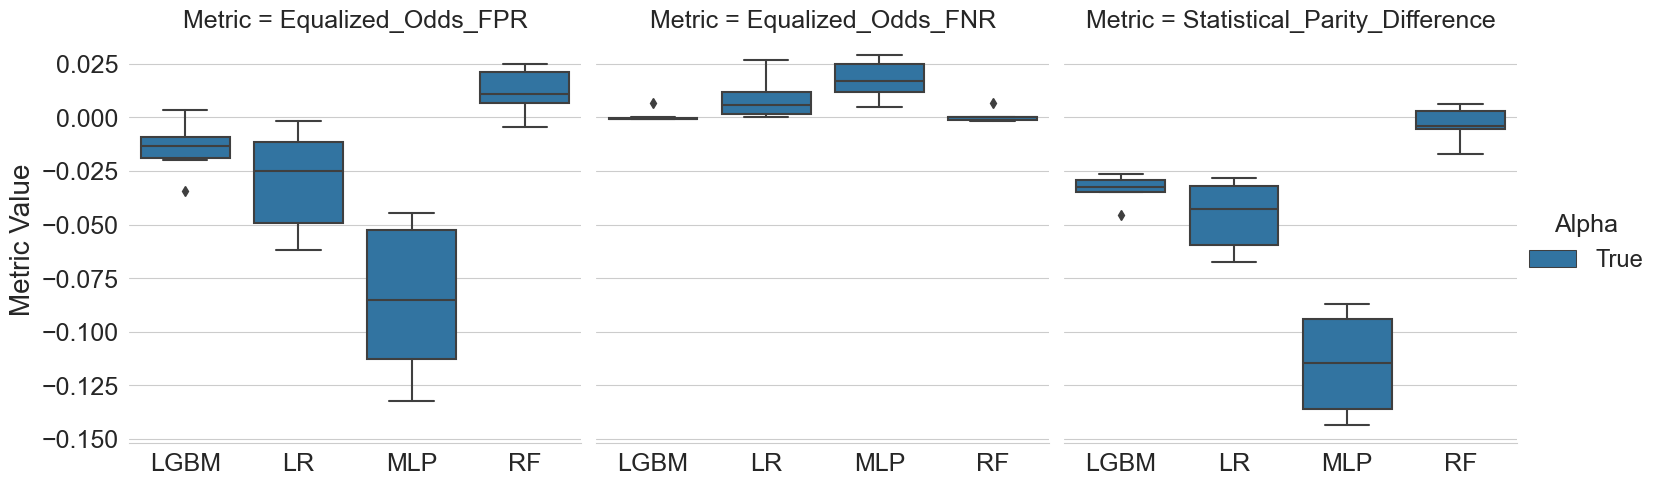

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR', 'Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)